## Assignment for EE5731 AY2023/2024 Semester 2
### Exploring Edge and Corner Detection from Ultra-dark Images and Finding Epipolar Lines from Stereo Image Pairs (100)

#### Background
While understanding of vision information through computer vision techniques have been developed (and still developing) over the past decades, current techniques may not be applied directly to real-world applications due to various constraints. One of the concerns is that current techniques are mainly developed assuming the input data are shot under a non-challenging environment, with adequate illumination and contrast. This leads to the observable fragility of current techniques, which may not be capable to generalize well to adverse environments, including dark environments with low illumination. Take security surveillance as an example: obtaining crucial visual information such as edges and corners could play a vital role in detecting objects for anomaly detection. However, anomalies are more common at nighttime and in dark environments, yet current computer vision approaches are largely obscured by darkness, and are unable to extract key visual information effectively. It is therefore highly desirable to explore how we could obtain visual information given the current computer vision approaches in ultra-dark images.

#### Requirements
In this assignment, you are to complete several tasks that explores ways to obtain edges and corners from ultra-dark images, and to find epipolar lines from stereo dark image pairs.

Before doing the project, please read the instructions carefully (failure to follow them may result in unnecessary penalty):

1. Implement your codes with the code block in jupyter notebook, you may add in however much code blocks you require. TODO code blocks are added as placeholders. **DO NOT** modify the instructional markdown blocks;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed, comments are **markable**);
3. Make sure that the **submitted notebooks have been run** and the **cell outputs are clearly visible**.
4. Write your answers in the given markdown cells (with [**Fill in xxxx**]), keep your answers clear and concise;
5. Your submission should be the exported PDF file of your jupyter notebook. It is easier for you to **"Export to HTML"** first, then **Print to PDF**. Please print your PDF strictly in **Portrait** mode. Name your PDF file strictly to **"MATRICULATION NUMBER_YOUR NAME_CA1.pdf"**
6. Incorrect submission format will result in a **direct** 20 points (out of 100) deduction.
6. Do submit your project on [Canvas](https://canvas.nus.edu.sg/) before the deadline: **5:59 pm (SGT), 4 October, 2024**; 
7. Policy on late submission: the deadline is a strict one, so please prepare and plan early and carefully. Any late submission will be deducted 10 points (out of 100) for every 24 hours.
8. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for **plagiarism**.

#### Before Task 1
- For the following task, you are to use [Pic1](https://canvas.nus.edu.sg/files/4601735/download?download_frd=1) as the ultra-dark image (denote as Dark-1). The corresponding long-exposure normal brightness image is [GT1](https://canvas.nus.edu.sg/files/4601732/download?download_frd=1) (denote as Bright-1).
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv2.Canny or its equivalence for Canny edge detection, and cv2.equalizeHist for histogram equalization). Using such functions would consider the code to be erroneous.

#### Task 1: Canny edge detection and Harris corener detection in ultra-dark images (60%)
In this task, you will need to implement the Canny edge detection algorithm and try to improve its performance with image enhancement methods. You are to discuss how the characteristics of ultra-dark images affect the performance of Canny edge detection, and how different image enhancement methods would improve/affect the performance of Canny edge detection on ultra-dark images. You are to follow the following steps (requirements):

##### Detailed Steps/Requirements for Task 1:
1. Compute the image histograms of both Dark-1 and Bright-1, then discuss your observations, what is the characteristics of an ultra-dark image and how it is observed through the image histograms. (10%)
2. Perform Canny edge detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Canny edge detection (e.g., after image smoothing, after computing partial derivatives, after applying threshold, etc.) as well as the final output. Observe and compare the performances of Canny edge detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
3. Perform Harris corner detector detection on both Dark-1 and Bright-1. For **at least one of the images**, show the output of every single key step of Harris corner detector detection as well as the final output. Observe and compare the performances of Harris corner detector detection on Dark-1 and Bright-1 and discuss why you would observe your result. (10%)
4. Implement **histogram equalization (HE)** from scratch to Dark-1. Output the results of HE (denote as Dark-1-HE) and discuss your observation: how HE change/improve the sampled images. Hypothesize how will the output of Canny edge detection and Harris corner detection be like for Dark-1-HE. (10%)
5. Apply your implementation of Canny edge detection and Harris corner detection onto your HE-enhanced sampled images and demonstrate the final output. Do the final outputs fit your hypothesis? If yes, rationalize your hypothsis. If not, describe and explain the differences. Also discuss how are the results compared to that of Bright-1? (10%)
6. Lastly, choose a image enhancement method you prefer. **State** what image enhancement method has been chosen. Implement it with **appropriate comments** and output the results (denote as Dark-1-Self). Apply Canny edge detection and Harris corner detection onto Dark-1-Self and display the results. Discuss the differences between the Dark-1-Self against Dark-1-HE. Further, observe, compare, and rationalize the difference between the edges and corners detected between Dark-1, Dark-1-HE, Dark-1-Self, and Bright-1. (10%)
- *Note for Step 6: you may use open-source codes or direct functions in OpenCV or equivalent for the chosen image enhancement method.*

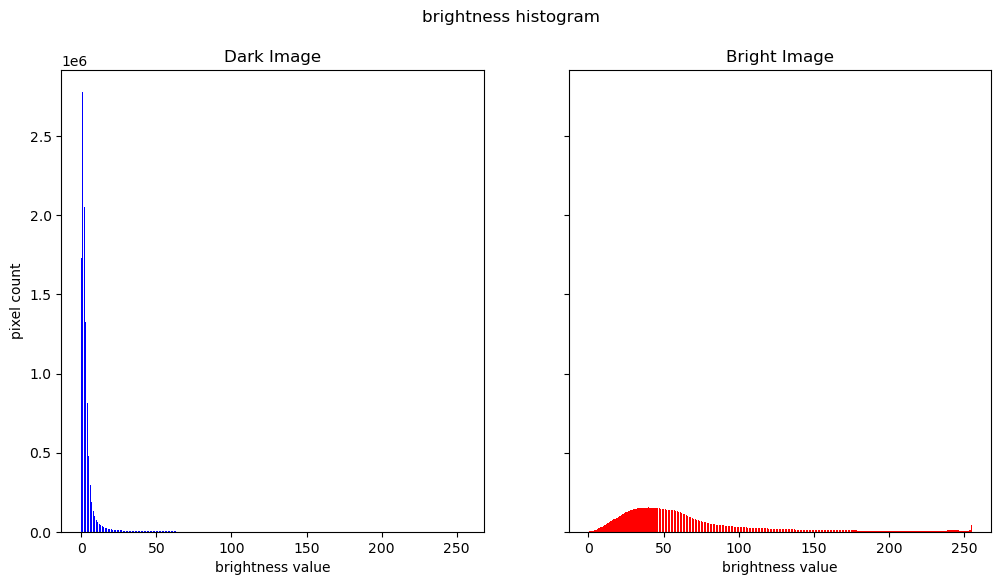

In [2]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################

from PIL import Image
import matplotlib.pyplot as plt

def calculate_brightness_histogram(image_path):
    # load the image
    image = Image.open(image_path)
    grayscale_image = image.convert("L")
    width, height = grayscale_image.size
    # calc the histogram
    histogram = [0] * 256
    for y in range(height):
        for x in range(width):
            brightness = grayscale_image.getpixel((x, y))
            histogram[brightness] += 1
    return histogram

image_path_dark = 'Pic1.jpg'
image_path_bright = 'GT1.jpg'
image_pathes = [('dark', image_path_dark), ('bright',image_path_bright)]

histogram1 = calculate_brightness_histogram(image_pathes[0][1])
histogram2 = calculate_brightness_histogram(image_pathes[1][1])

# draw histogram
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
fig.suptitle('brightness histogram')

axs[0].bar(range(256), histogram1, color='blue')
axs[0].set_title('Dark Image')
axs[0].set_xlabel('brightness value')
axs[0].set_ylabel('pixel count')


axs[1].bar(range(256), histogram2, color='red')
axs[1].set_title('Bright Image')
axs[1].set_xlabel('brightness value')

plt.show()



[**Discussion in step_1**]

**Dark Image Observation**

It seems like the pixels of dark image mostly concentrate in the low brightness value area, and the crest of dark image pixels also lays on the extremely low brightness value area. 

**Bright Image Observation**

While the the pixels of Bright image distrubute more evenly and has crest laying on mid-low brightness area, which has lower height.

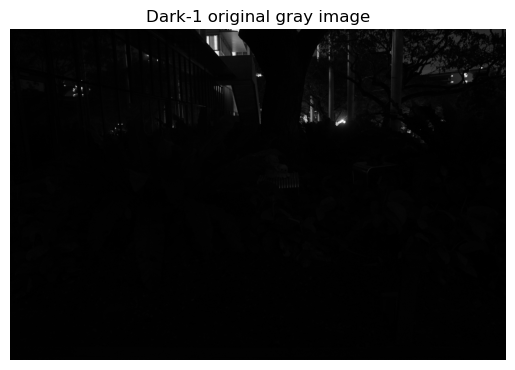

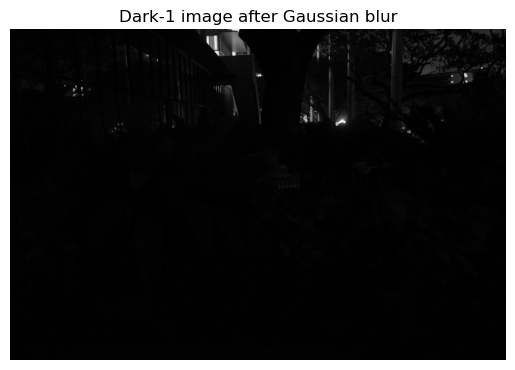

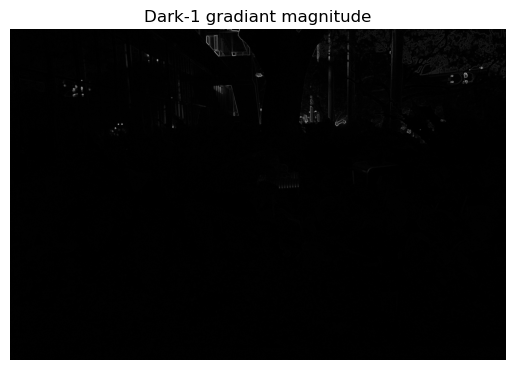

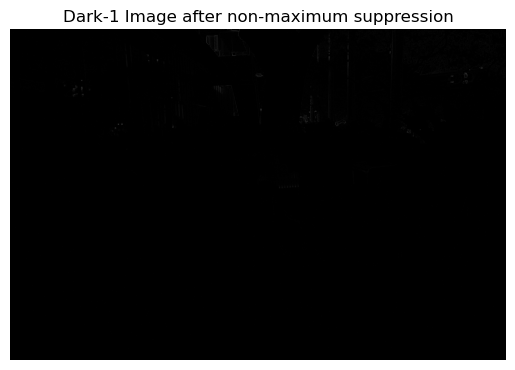

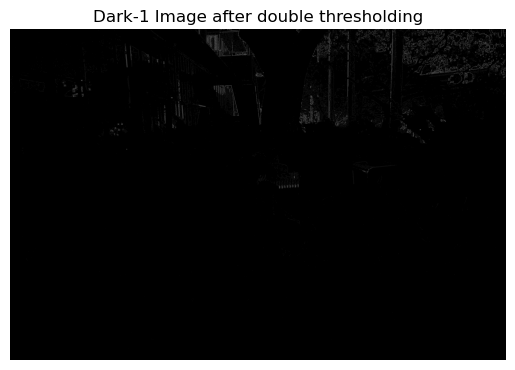

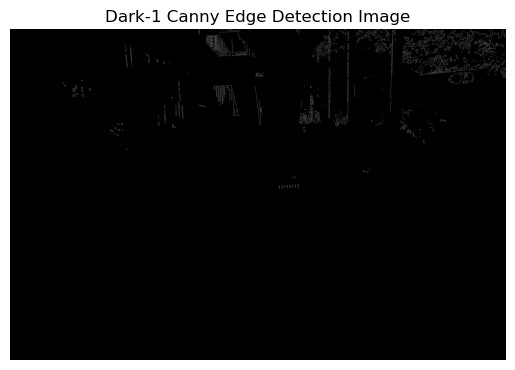

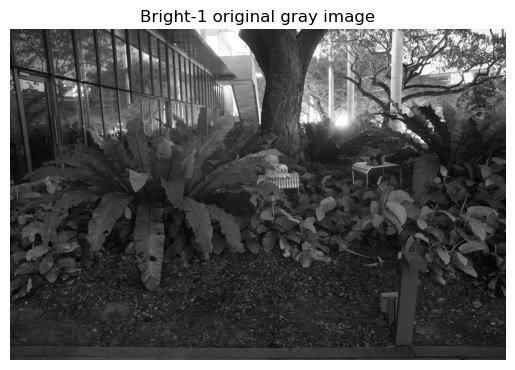

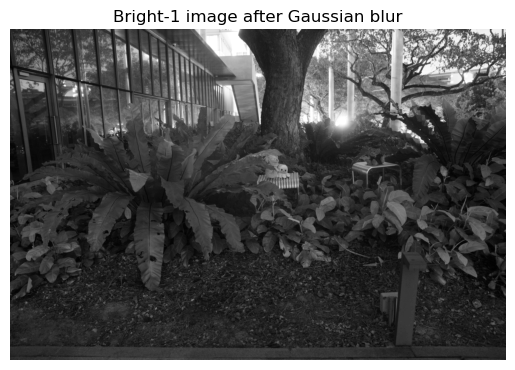

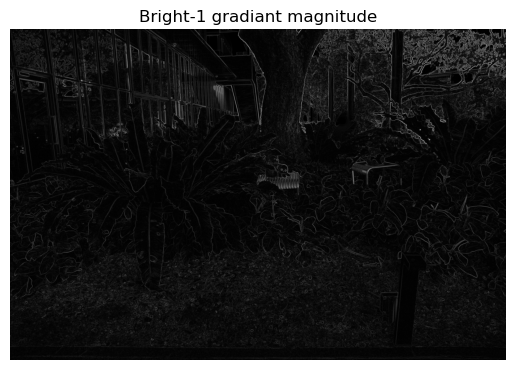

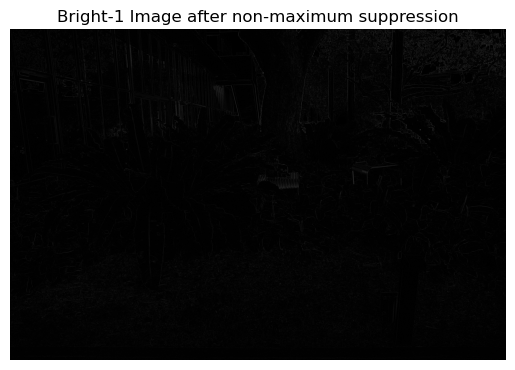

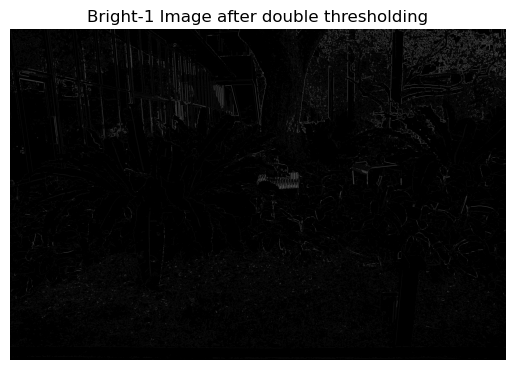

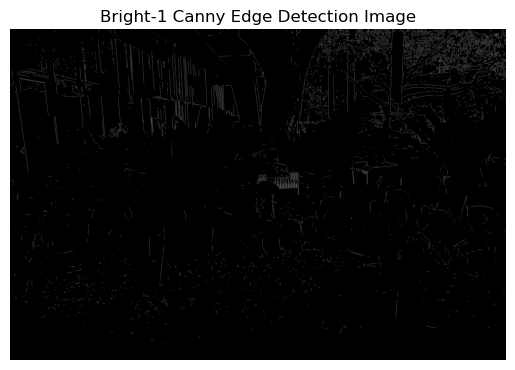

In [3]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt

# First create a canny detection function
def canny_edge_detection(image_path, image_name, low_threshold=35, high_threshold=100, show_steps=False, show=True):
    """
    Arguments:
    - image_path: path to the image file.
    - low_threshold: low threshold for the hysteresis procedure.
    - high_threshold: high threshold for the hysteresis procedure.
    - show_steps: whether to show intermediate steps of the algorithm.

    return:
    - edges: the final edge image.
    """
    # read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if show_steps:
        plt.imshow(gray, cmap='gray')
        plt.title(image_name + ' ' + 'original gray image')
        plt.axis('off')
        plt.show()
    
    # gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)
    if show_steps:
        plt.imshow(blurred, cmap='gray')
        plt.title(image_name + ' ' + 'image after Gaussian blur')
        plt.axis('off')
        plt.show()
    
    # gradient calculation
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    # gradient magnitude and angle
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * (180 / np.pi)
    angle[angle < 0] += 180  # modify angle to [0, 180]

    if show_steps:
        plt.imshow(magnitude, cmap='gray')
        plt.title(image_name + ' ' + 'gradiant magnitude')
        plt.axis('off')
        plt.show()
    
    # Non-Maximum Suppression
    def non_max_suppression(magnitude, angle):
        H, W = magnitude.shape
        output = np.zeros((H, W), dtype=np.float32)
        angle = angle % 180

        for i in range(1, H-1):
            for j in range(1, W-1):
                q = 255
                r = 255

                # 0 degree
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = magnitude[i, j+1]
                    r = magnitude[i, j-1]
                # 45 degree
                elif (22.5 <= angle[i,j] < 67.5):
                    q = magnitude[i+1, j-1]
                    r = magnitude[i-1, j+1]
                # 90 degree
                elif (67.5 <= angle[i,j] < 112.5):
                    q = magnitude[i+1, j]
                    r = magnitude[i-1, j]
                # 135 degree
                elif (112.5 <= angle[i,j] < 157.5):
                    q = magnitude[i-1, j-1]
                    r = magnitude[i+1, j+1]

                if (magnitude[i,j] >= q) and (magnitude[i,j] >= r):
                    output[i,j] = magnitude[i,j]
                else:
                    output[i,j] = 0
        return output

    suppressed = non_max_suppression(magnitude, angle)
    if show_steps:
        plt.imshow(suppressed, cmap='gray')
        plt.title(image_name + ' ' + 'Image after non-maximum suppression')
        plt.axis('off')
        plt.show()
    
    # Double Threshold
    strong = 255
    weak = 50

    output = np.zeros_like(suppressed, dtype=np.uint8)
    strong_i, strong_j = np.where(suppressed >= high_threshold)
    zeros_i, zeros_j = np.where(suppressed < low_threshold)
    weak_i, weak_j = np.where((suppressed >= low_threshold) & (suppressed < high_threshold))

    output[strong_i, strong_j] = strong
    output[weak_i, weak_j] = weak

    if show_steps:
        plt.imshow(output, cmap='gray')
        plt.title(image_name + ' ' + 'Image after double thresholding')
        plt.axis('off')
        plt.show()
    
    # Hysteresis Thresholding
    def hysteresis(img):
        H, W = img.shape
        for i in range(1, H-1):
            for j in range(1, W-1):
                if img[i,j] == weak:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i,j] = strong
                    else:
                        img[i,j] = 0
        return img

    edges = hysteresis(output)
    
    # Final result
    if show_steps:
        plt.imshow(edges, cmap='gray')
        plt.title(image_name + ' ' + 'Canny Edge Detection Image')
        plt.axis('off')
        plt.show()
    
    if not show_steps and show:
        plt.imshow(edges, cmap='gray')
        plt.title(image_name + ' ' + 'Canny Edge Detection Image')
        plt.axis('off')
        plt.show()
    
    return edges

edge_dark_1 = canny_edge_detection(image_path_dark, "Dark-1", low_threshold=10, high_threshold=40, show_steps=True)
edge_bright_1 = canny_edge_detection(image_path_bright, "Bright-1", low_threshold=35, high_threshold=120, show_steps=True)

[**Discussion in Step 2**]

##### Observation
Generally, It seems that the canny edge detection performs better on bright picture than on dark picture. The edge picture of bright-1 has more clear edge on bright area while the dark-1 edge picture has nearly no edge in dark area and less clear edge on bright area.

**Note:** The double threshhold is seperately adjusted for both dark-1 and bright-1, however it's still hard to improve the dark-1's performance under only canny detection.

##### Possible Reasons
- The pixels of gray picture of dark-1 mostly lay on the area of extremely dark area and are easy to be filtered by low threshold in the stage of 'Double Thresholding'.
- The weak edge pixels are too much due to the extreme low light, and make it hard to find nearby strong edge in the stage of 'Hysteresis Thresholding'.

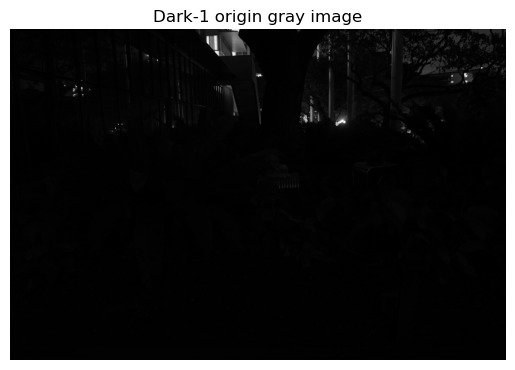

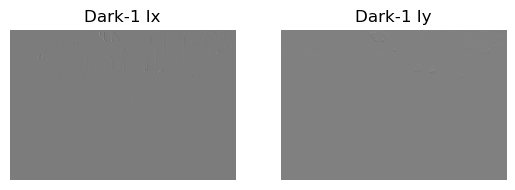

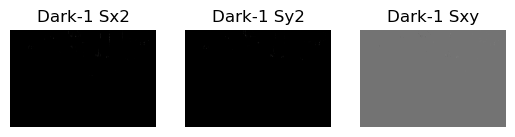

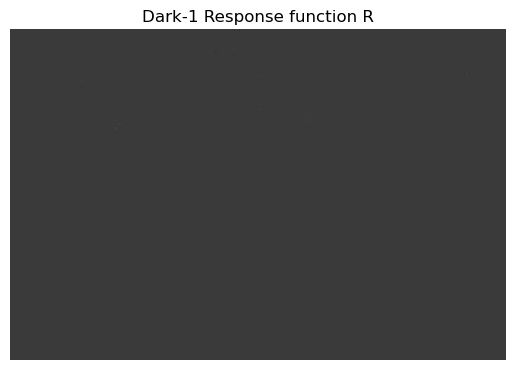

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


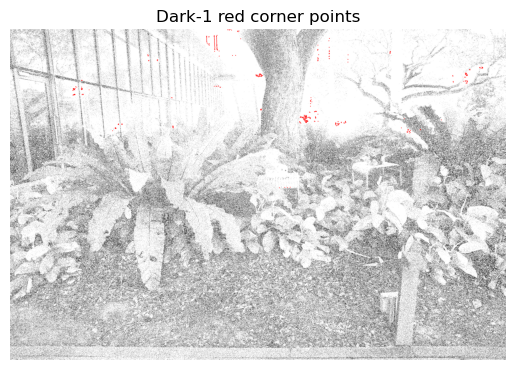

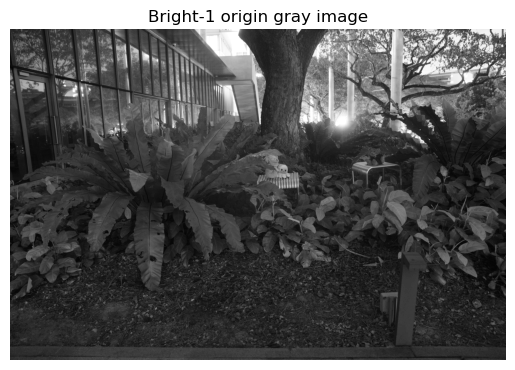

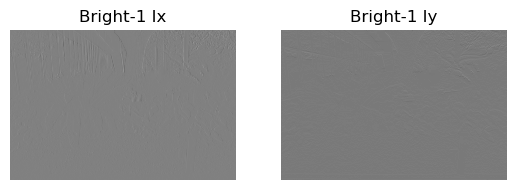

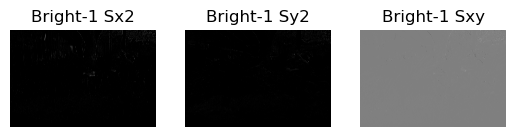

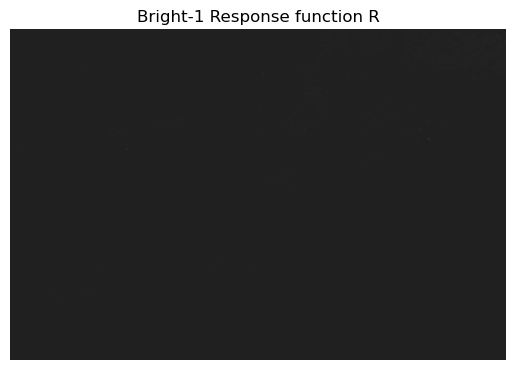

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


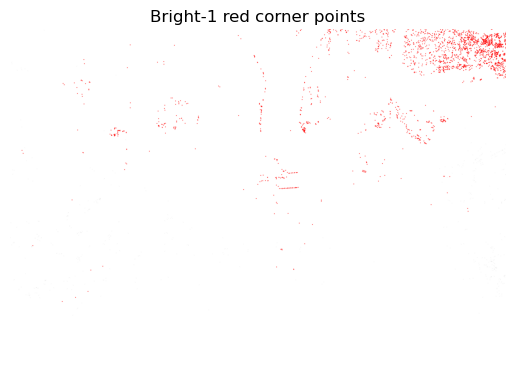

In [4]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path: str, name: str, k=0.04, threshold=0.01, show_steps=False, show = True):
    """
    realizer Harris corner detection and show each intermediate step according to the show_steps parameter.

    arguments:
    - image_path: Path to the image file.
    - k: Harris corner sensitive coefficient [0.04, 0.06].
    - threshold: Threshold for corner detection.
    - show_steps: Whether to show intermediate steps of the algorithm.

    return:
    - corners: Image with detected corners marked in red.
    """
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    if show_steps:
        plt.imshow(gray, cmap='gray')
        plt.title(name + ' origin gray image')
        plt.axis('off')
        plt.show()
    
    # compute gradient Ix and Iy
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    if show_steps:
        plt.subplot(1, 2, 1)
        plt.imshow(Ix, cmap='gray')
        plt.title(name + ' Ix')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(Iy, cmap='gray')
        plt.title(name + ' Iy')
        plt.axis('off')
        plt.show()
        
    # compute Ix^2, Iy^2, Ix*Iy
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy
    
    # W eighted average of Ix^2, Iy^2, Ix*Iy with Gaussian filter
    kernel_size = 3
    sigma = 1
    Sx2 = cv2.GaussianBlur(Ix2, (kernel_size, kernel_size), sigma)
    Sy2 = cv2.GaussianBlur(Iy2, (kernel_size, kernel_size), sigma)
    Sxy = cv2.GaussianBlur(Ixy, (kernel_size, kernel_size), sigma)
    if show_steps:
        plt.subplot(1, 3, 1)
        plt.imshow(Sx2, cmap='gray')
        plt.title(name + ' Sx2')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(Sy2, cmap='gray')
        plt.title(name + ' Sy2')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(Sxy, cmap='gray')
        plt.title(name + ' Sxy')
        plt.axis('off')
        plt.show()
    
    # Compute the Harris corner response function R
    detM = (Sx2 * Sy2) - (Sxy ** 2)
    traceM = Sx2 + Sy2
    R = detM - k * (traceM ** 2)
    if show_steps:
        plt.imshow(R, cmap='gray')
        plt.title(name + ' Response function R')
        plt.axis('off')
        plt.show()
    
    # Thresholding
    R_max = np.max(R)
    corners = np.zeros_like(gray, dtype=np.uint8)
    threshold_value = threshold * R_max
    corners[R > threshold_value] = 255
    
    # non-maximum suppression
    dst = cv2.dilate(R, None)
    corners = np.zeros_like(gray, dtype=np.uint8)
    corners[(R == dst) & (R > threshold_value)] = 255
    
    # mark the corners in the original image
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    corner_points = np.argwhere(corners)
    for point in corner_points:
        y, x = point
        cv2.circle(gray_rgb, (x, y), radius=3, color=(255, 0, 0), thickness=-1) 

    if show:
        plt.imshow(gray_rgb)
        plt.title(name + ' red corner points')
        plt.axis('off')
        plt.show()
    
    return gray_rgb

corner_dark_1_ = harris_corner_detection(image_path_dark, "Dark-1", k=0.04, threshold=0.01, show_steps=True)
corner_bright_1_ = harris_corner_detection(image_path_bright, "Bright-1", k=0.04, threshold=0.01, show_steps=True)


[**Fill in your discussion to Step 3 here**]

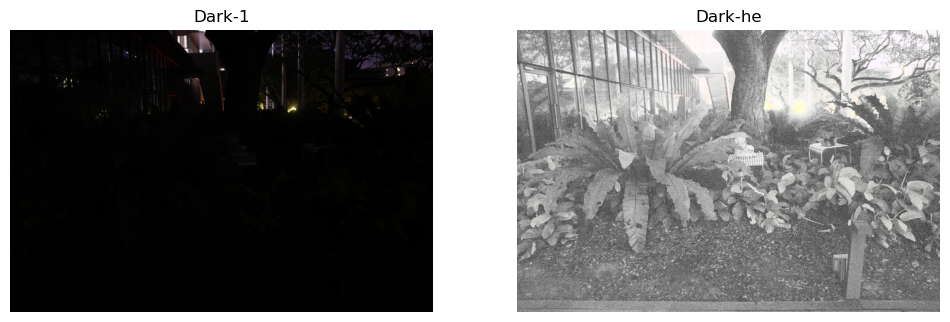

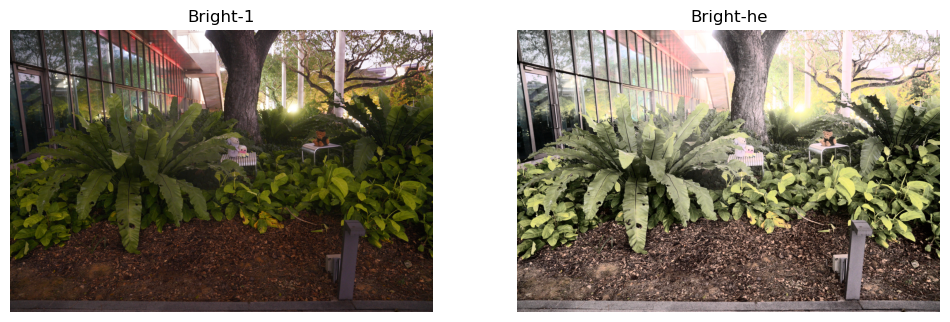

In [5]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image_path, output_path):
    """
    Histogram equalization for the input image.

    arguments:
    - image_path: Path to the input image file.
    - output_path: Path to save the output image file.

    return:
    - equalized_image: Image after histogram equalization.
    """
import cv2
import numpy as np

def histogram_equalization(image_path, output_path):
    """
    Histogram equalization for the input image.

    arguments:
    - image_path: Path to the input image file.
    - output_path: Path to save the output image file.

    return:
    - equalized_image: Image after histogram equalization.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError("image file not found.")

    # interface for different image types
    # gray
    if len(image.shape) == 2 or image.shape[2] == 1:
        equalized_image = equalize_gray_image(image)
    # color
    elif len(image.shape) == 3 and image.shape[2] == 3:
        equalized_image = equalize_color_image(image)
    else:
        raise ValueError("unsupported image type, only support gray and color image.")
    cv2.imwrite(output_path, equalized_image)
    return equalized_image

def equalize_gray_image(gray_image):
    """
    Perform histogram equalization on a grayscale image.

    Parameters:
    - gray_image: Input grayscale image (numpy array).

    Returns:
    - equalized_gray: Grayscale image after histogram equalization.
    """
    hist, bins = np.histogram(gray_image.flatten(), 256, [0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * (255 / cdf[-1])  # normalize
    # map the pixel value to the equalized value 
    equalized_gray = np.interp(gray_image.flatten(), bins[:-1], cdf_normalized)
    equalized_gray = equalized_gray.reshape(gray_image.shape).astype('uint8')

    return equalized_gray

def equalize_color_image(color_image):
    """
    Perform histogram equalization on a color image.

    Parameters:
    - color_image: Input color image (numpy array).
    
    Returns:
    - equalized_color: Color image after histogram equalization.
    """
    y_cr_cb = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)
    y_channel, cr_channel, cb_channel = cv2.split(y_cr_cb)
    # he on brightness channel
    equalized_y = equalize_gray_image(y_channel)
    # inconvert back to BGR
    equalized_y_cr_cb = cv2.merge((equalized_y, cr_channel, cb_channel))
    equalized_color = cv2.cvtColor(equalized_y_cr_cb, cv2.COLOR_YCrCb2BGR)

    return equalized_color

if __name__ == '__main__':
    dark_he_path = 'dark-he.jpg' 
    bright_he_path = 'bright-he.jpg'

    dark_equalized_img = histogram_equalization(image_path_dark, dark_he_path)
    bright_equalized_img = histogram_equalization(image_path_bright, bright_he_path)

    # dark-he show
    original_image = cv2.imread(image_path_dark)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Dark-1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(dark_equalized_img, cv2.COLOR_BGR2RGB))
    plt.title('Dark-he')
    plt.axis('off')
    plt.show()
    
    # bright-he show
    original_image = cv2.imread(image_path_bright)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Bright-1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(bright_equalized_img, cv2.COLOR_BGR2RGB))
    plt.title('Bright-he')
    plt.axis('off')
    plt.show()


[**Fill in your discussion to Step 4 here**]

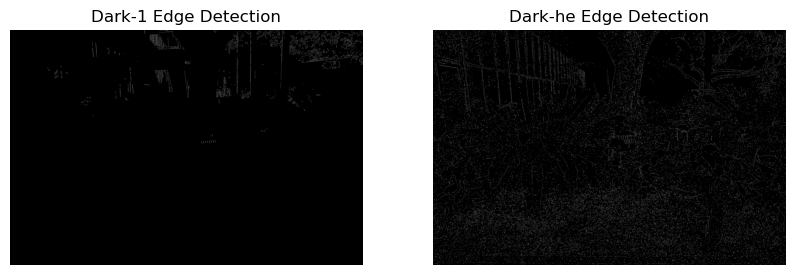

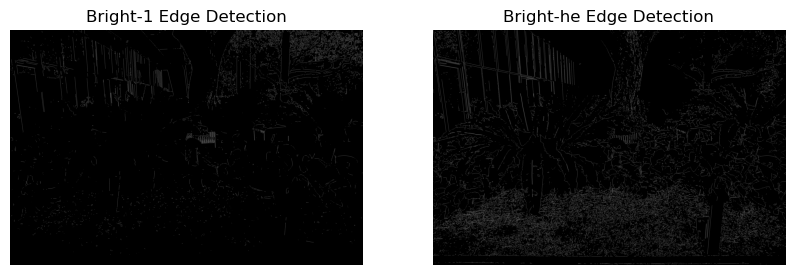

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


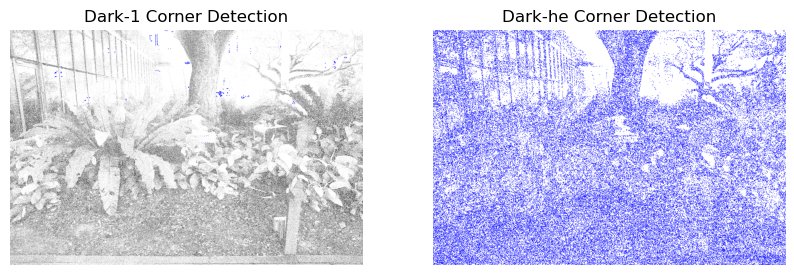

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


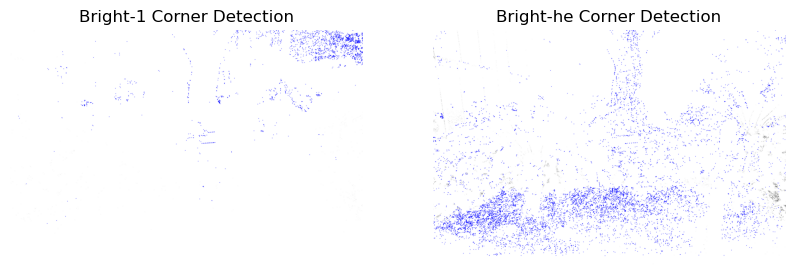

In [6]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 5 IS HERE                           ##
#############################################################################

def plot_comparison(original_image, he_image, title_original, title_he):
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(title_original)
    plt.axis('off')

    # HE image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(he_image, cv2.COLOR_BGR2RGB))
    plt.title(title_he)
    plt.axis('off')

    plt.show()

corner_dark_1 = harris_corner_detection(image_path_dark, "Dark-1", k=0.04, threshold=0.01, show_steps=False, show=False)
corner_bright_1 = harris_corner_detection(image_path_bright, "Bright-1", k=0.04, threshold=0.01, show_steps=False, show=False)
edge_dark_1 = canny_edge_detection(image_path_dark, "Dark-1", low_threshold=10, high_threshold=40, show_steps=False, show=False)
edge_bright_1 = canny_edge_detection(image_path_bright, "Bright-1", low_threshold=35, high_threshold=120, show_steps=False, show=False)

edge_dark_he = canny_edge_detection(dark_he_path, "Dark-he", low_threshold=50, high_threshold=150, show_steps=False, show=False)
edge_bright_he = canny_edge_detection(bright_he_path, "Bright-he", low_threshold=50, high_threshold=150, show_steps=False, show=False)
corner_dark_he = harris_corner_detection(dark_he_path, "Dark-he", k=0.06, threshold=0.06, show_steps=False, show=False)
corner_bright_he = harris_corner_detection(bright_he_path, "Bright-he", k=0.04, threshold=0.03, show_steps=False, show=False)

# draw comparison plot
plot_comparison(edge_dark_1, edge_dark_he, 'Dark-1 Edge Detection', 'Dark-he Edge Detection')
plot_comparison(edge_bright_1, edge_bright_he, 'Bright-1 Edge Detection', 'Bright-he Edge Detection')
plot_comparison(corner_dark_1, corner_dark_he, 'Dark-1 Corner Detection', 'Dark-he Corner Detection')
plot_comparison(corner_bright_1, corner_bright_he, 'Bright-1 Corner Detection', 'Bright-he Corner Detection')

[**Fill in your discussion to Step 5 here**]

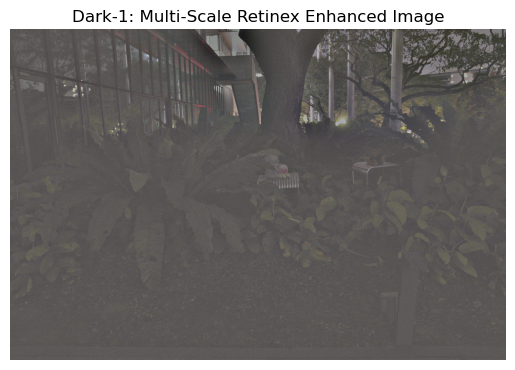

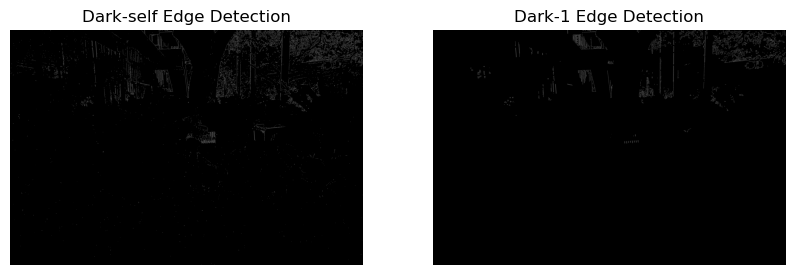

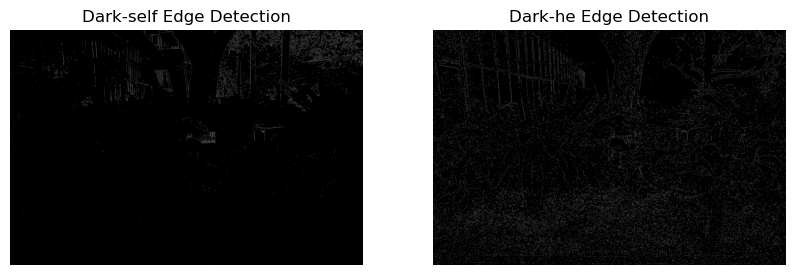

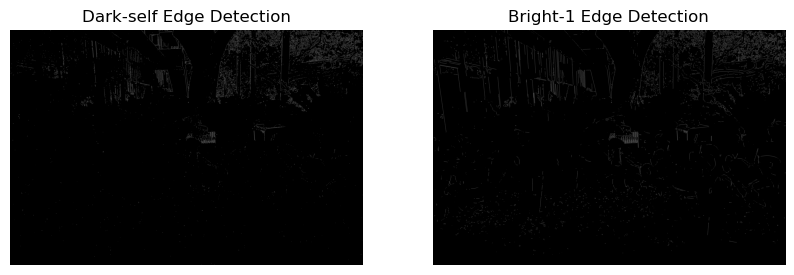

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


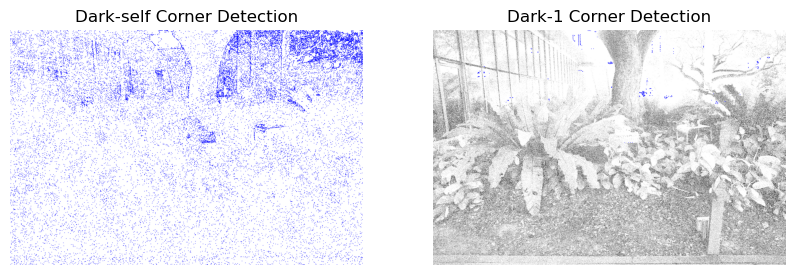

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


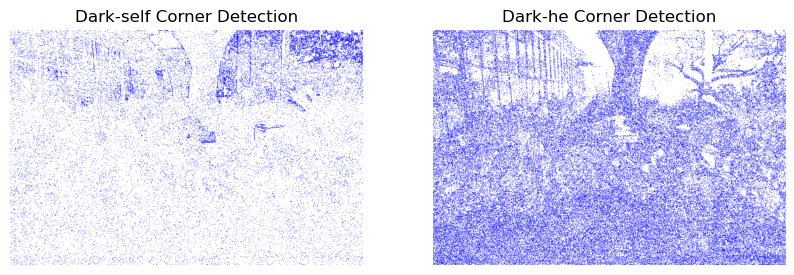

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


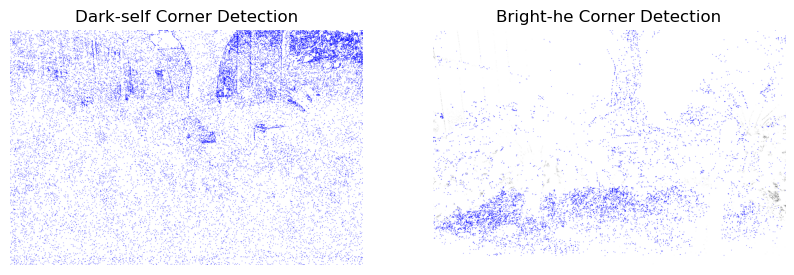

In [46]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 6 IS HERE                           ##
#############################################################################


# from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


def linear_enhance(image, alpha=1.5, beta=0):
    """
    Enhances an image using a linear transformation: new_pixel = alpha * pixel + beta.
    
    Parameters:
    - image : numpy.ndarray
        The input image to be enhanced.
    - alpha : float, optional
        The gain factor (contrast control). A value > 1 increases contrast, while a value < 1 decreases contrast.
        Default is 1.5.
    - beta : int, optional
        The bias value (brightness control). Positive values increase brightness, while negative values decrease it.
        Default is 0.
    
    Returns:
    - enhanced_image : numpy.ndarray
        The enhanced image with the same dimensions as the input image.
    """
    # Apply linear transformation to the image: new_pixel = alpha * pixel + beta
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    
    return enhanced_image


def sharpen_image_adjustable(image, alpha=0.2):
    """
    Sharpens an image using a convolution kernel with adjustable sharpening strength.

    Parameters:
    image : numpy.ndarray
        The input image to be sharpened.
    alpha : float, optional
        The weight applied to the sharpened image. Higher values increase sharpening (default is 1.5).

    Returns:
    sharpened_image : numpy.ndarray
        The sharpened image.
    """
    # Define the sharpening kernel
    kernel = np.array([[0, 0, -1, 0, 0],
                   [0, -1, -2, -1, 0],
                   [-1, -2, 16, -2, -1],
                   [0, -1, -2, -1, 0],
                   [0, 0, -1, 0, 0]])
    
    # Apply the kernel to the image
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    # Blend the original and sharpened images using alpha for sharpening strength
    output_image = cv2.addWeighted(image, 1 - alpha, sharpened_image, alpha, 0)
    
    return output_image


def denoise_image_nl_means(image, h=10, template_window_size=7, search_window_size=21):
    """
    Denoises an image using the Non-Local Means Denoising algorithm.
    
    Parameters:
    - image : The input image to be denoised.
    - h :  Parameter regulating filter strength. A larger h means more smoothing (default is 10).
    - template_window_size : Size of the window used to compute the weights (default is 7).
    - search_window_size : Size of the window used to search for patches similar to the central pixel (default is 21).

    Returns:
    - denoised_image : The denoised image.
    """
    denoised_image = cv2.fastNlMeansDenoising(image, h=h, 
                                              templateWindowSize=template_window_size,
                                              searchWindowSize=search_window_size)
    return denoised_image

def multi_scale_retinex(img, scales=[15, 80, 250]):
    """
    Multi-Scale Retinex (MSR) algorithm to enhance the image by reducing illumination effects.
    
    Parameters:
    - img: Input image (BGR format).
    - scales: List of scales (sigma values) for Gaussian blurs in MSR. Default is [15, 80, 250].
    
    Returns:
    - msr_img: The enhanced image after MSR.
    """
    # Convert image to float32 and add 1 to avoid log(0) happens
    img = np.float32(img) + 1.0
    msr_result = np.zeros_like(img)

    for scale in scales:
        img_blur = cv2.GaussianBlur(img, (0, 0), sigmaX=scale, sigmaY=scale)
        retinex = np.log(img) - np.log(img_blur + 1.0)
        msr_result += retinex
        
    # Average the results from all scales
    msr_result /= len(scales)
    msr_normalized = cv2.normalize(msr_result, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    msr_img = np.uint8(msr_normalized)

    return msr_img

def msr_enhancement(image_path, output_path, scales=[15, 80, 250]):
    """
    Apply Multi-Scale Retinex (MSR) enhancement to the input image and save the result.
    
    Parameters:
    - image_path: File path of the input image.
    - output_path: File path to save the enhanced image.
    - scales: List of scales for Gaussian blurs in MSR. Default is [15, 80, 250].
    
    Returns:
    - enhanced_img: The enhanced image after MSR.
    """
    img = cv2.imread(image_path)
    if img is None:
        print("Could not load the image. Please check the file path.")
        return

    linear_enhanced_image = linear_enhance(img, alpha=1.8, beta=20)
    # Apply MSR to each channel (R, G, B)
    enhanced_channels = []
    for i in range(3):
        enhanced_channel = multi_scale_retinex(linear_enhanced_image[:, :, i], scales=scales)
        enhanced_channels.append(enhanced_channel)
    enhanced_img = cv2.merge(enhanced_channels)
    # Sharpen the denoised image
    enhanced_img = sharpen_image_adjustable(enhanced_img, alpha=0.2)
    # Denoise the enhanced image
    enhanced_img = denoise_image_nl_means(enhanced_img, h=7)
    cv2.imwrite(output_path, enhanced_img)

    return enhanced_img


retinex_image_path = 'dark-retinex.jpg'
# Apply mix enhancement (including linear-enhancement, multi-scale-retinex, sharpening and denoising) to the dark image
enhanced_img = msr_enhancement(image_path_dark, retinex_image_path, scales=[70, 200])

if enhanced_img is not None:
    img_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Dark-1: Multi-Scale Retinex Enhanced Image")
    plt.axis('off')
    plt.show()

edge_dark_retinex = canny_edge_detection(retinex_image_path, "Dark-retinex edge detection", low_threshold=10, high_threshold=60, show_steps=False, show=False)
corner_dark_retinex = harris_corner_detection(retinex_image_path, "Dark-retinex corner detection", k=0.04, threshold=0.01, show_steps=False, show=False)

# draw comparison plot
plot_comparison(edge_dark_retinex, edge_dark_1, 'Dark-self Edge Detection', 'Dark-1 Edge Detection')
plot_comparison(edge_dark_retinex, edge_dark_he, 'Dark-self Edge Detection', 'Dark-he Edge Detection')
plot_comparison(edge_dark_retinex, edge_bright_1, 'Dark-self Edge Detection', 'Bright-1 Edge Detection')
plot_comparison(corner_dark_retinex, corner_dark_1, 'Dark-self Corner Detection', 'Dark-1 Corner Detection')
plot_comparison(corner_dark_retinex, corner_dark_he, 'Dark-self Corner Detection', 'Dark-he Corner Detection')
plot_comparison(corner_dark_retinex, corner_bright_he, 'Dark-self Corner Detection', 'Bright-he Corner Detection')

[**Fill in your discussion to Step 6 here**]

#### Before Task 2
- For the following task, you are to use [GT1](https://canvas.nus.edu.sg/files/4601732/download?download_frd=1) (denote as Bright-1) and [GT2](https://canvas.nus.edu.sg/files/4601734/download?download_frd=1) (denote as Bright-2) as the stereo image pair.
- All raw images are given in RGB format (colored images), but you may also convert to grayscale images for your convenience. Show the step and result of grayscale conversion first if you are to convert to grayscale for your tasks.
- You may opt to resize the images in case you think the image is too large, the resize images **must not** be smaller than **800*800**. Show the step and result of resize first if you opt to resize the images.
- **IMPORTANT!** You may use any function of OpenCV or its equivalence for basic operations (e.g., loading images, matrix computation, etc.), but **strictly NOT** the direct functions for each individual task/step (e.g., cv.computeCorrespondEpilines for computing and drawing the epipolar lines and cv.findFundamentalMat for computing the fundamental matrix). Using such functions would consider the code to be erroneous.

#### Task 2: Computing the Fundamental Matrix and Finding the Epipolar Lines for Stereo Image Pairs (40%)
In this task, you will need to compute the fundamental matrix based on the (Normalized) 8-point algorithm. You are to choose the keypoints manually (you can use tools such as Paint for Windows), and then compute the fundamental matrix. You would then find, draw out, observe and discuss about the epipolar lines for your chosen keypoints. You are to follow the following steps (requirements):

##### Steps/Requirements for Task 2:
1. Find and highlight the keypoints in the image manually. For the 8-point algorithm, you should select at least 8 non-colinear points. State the individual positions in **homogeneous** coordinates, and highlight them in the corresponding image. If you choose to use the normalized 8-pt algorithm, you should state the coordinates of both the original keypoints and the normalized keypoints and showcase your code for normalization, but you only need to highlight the original keypoints. If you find highlighting in the pixel level is difficult, you may use a small circle centered at the selected keypoint for highlighting. (10%)
2. With the selected keypoints, compute the fundamental matrix *F* in detail. State the obtained fundamental matrix. (10%)
3. With the fundamental matrix, draw all the epipolar lines corresponding to the selected keypoints on both images. Observe and discuss how these lines indicate the positioning of the cameras. Also discuss if the computed lines match your intuitive idea of how the lines should be formed. If yes, why? If no, why not? (10%)
4. Lastly, with the computed fundamental matrix, we would be also able to find the epipolar line and subsequently the corresponding keypoint given a new keypoint. Select a **new** keypoint that does not lie on any of the drawn epipolar lines on Bright-1, then draw the epipolar line corresponding to this new keypoint on Bright-2. Observe and discuss if a possible keypoint can be obtained by searching across the drawn epipolar line. (10%)

In [ ]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
#############################################################################

import cv2
import json
from functools import partial
import matplotlib.pyplot as plt

# 回调函数，用于处理鼠标点击事件
def click_event(event, x, y, flags, param):
    img, container, img_id, click_count = param
    if event == cv2.EVENT_LBUTTONDOWN:
        click_count[0] += 1
        print(f"Clicked at: ({x}, {y})")
        container.append((x, y))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, f"({x}, {y})  #{click_count[0]}", (x, y), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        cv2.imshow('GT1 Image', img)
        if len(container) >= 8:
            with open(f'GT{img_id}_coordinates.json', 'w') as f:
                json.dump(container, f)
            cv2.putText(img, "dump json", (400, 400), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# 读取图像
GT1_img = cv2.imread('GT1.jpg')
GT1_img = cv2.resize(GT1_img, (800, 800))
click_count = [0]
GT1_coordinates = []

# 显示图像
plt.imshow(cv2.cvtColor(GT1_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("GT1 Image")


# Display the images using OpenCV
cv2.imshow('GT1 Image', GT1_img)
cv2.setMouseCallback('GT1 Image', click_event, (GT1_img, GT1_coordinates, 1, click_count))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#############################################################################
##                                                                         ##
##                    TODO: CONTINUATION FOR STEP 1                        ##
#############################################################################

import cv2
import json
from functools import partial
import matplotlib.pyplot as plt

def click_event(event, x, y, flags, param):
    img, container, img_id, click_count = param
    if event == cv2.EVENT_LBUTTONDOWN:
        click_count[0] += 1
        print(f"Clicked at: ({x}, {y})")
        container.append((x, y))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, f"({x}, {y})  #{click_count[0]}", (x, y), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        cv2.imshow('GT2 Image', img)
        if len(container) >= 8:
            with open(f'GT{img_id}_coordinates.json', 'w') as f:
                json.dump(container, f)
            cv2.putText(img, "dump json", (400, 400), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

GT2_img = cv2.imread('GT2.jpg')
GT2_img = cv2.resize(GT2_img, (800, 800))
click_count = [0]
GT2_coordinates = []

plt.imshow(cv2.cvtColor(GT2_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("GT2 Image")


# Display the images using OpenCV
cv2.imshow('GT2 Image', GT2_img)
cv2.setMouseCallback('GT2 Image', click_event, (GT2_img, GT2_coordinates, 2, click_count))
cv2.waitKey(0)
cv2.destroyAllWindows()

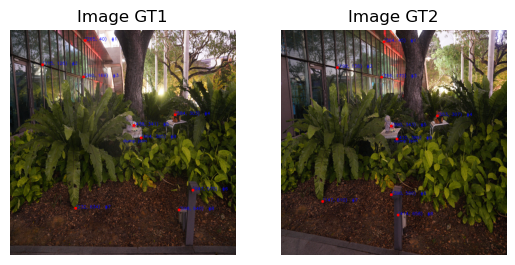

In [7]:
#############################################################################
##                                                                         ##
##                    TODO: CONTINUATION FOR STEP 1                        ##
#############################################################################

import cv2
import matplotlib.pyplot as plt
import json

image_1 = cv2.imread('image_select_gt1.png')
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

with open('GT1_coordinates.json', 'r') as f:
    gt1_coordinates = json.load(f)
for (x, y) in gt1_coordinates:
    cv2.circle(image_1_rgb, (x, y), 5, (255, 0, 0), -1)

plt.subplot(1, 2, 1)
plt.imshow(image_1_rgb)
plt.axis('off') 
plt.title('Image GT1')

image_2 = cv2.imread('image_select_gt2.png')
image_2_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

with open('GT2_coordinates.json', 'r') as f:
    gt2_coordinates = json.load(f)
for (x, y) in gt2_coordinates:
    cv2.circle(image_2_rgb, (x, y), 5, (255, 0, 0), -1)

plt.subplot(1, 2, 2)
plt.imshow(image_2_rgb)
plt.axis('off') 
plt.title('Image GT2')
plt.show()

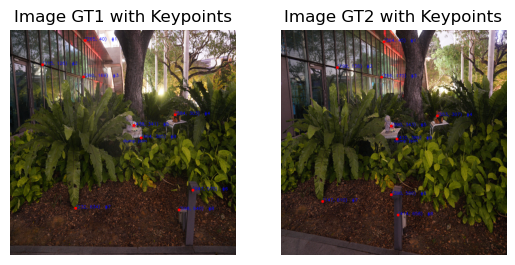

Original GT1 Coordinates (Homogeneous):
[[265.  40.   1.]
 [115. 126.   1.]
 [260. 169.   1.]
 [584. 303.   1.]
 [438. 341.   1.]
 [647. 570.   1.]
 [232. 634.   1.]
 [598. 640.   1.]
 [464. 385.   1.]]
Normalized GT1 Coordinates:
[[-0.5656706  -1.32268461  1.        ]
 [-1.1926454  -0.96321906  1.        ]
 [-0.58656976 -0.78348629  1.        ]
 [ 0.76769581 -0.2233888   1.        ]
 [ 0.15744034 -0.06455518  1.        ]
 [ 1.03102523  0.89262634  1.        ]
 [-0.70360505  1.16013559  1.        ]
 [ 0.82621346  1.18521458  1.        ]
 [ 0.26611597  0.11935742  1.        ]]
Original GT2 Coordinates (Homogeneous):
[[364.  45.   1.]
 [199. 136.   1.]
 [356. 170.   1.]
 [553. 307.   1.]
 [390. 343.   1.]
 [390. 586.   1.]
 [147. 610.   1.]
 [414. 658.   1.]
 [410. 389.   1.]]
Normalized GT2 Coordinates:
[[ 0.02706998 -1.45003172  1.        ]
 [-0.73140029 -1.03172387  1.        ]
 [-0.00970433 -0.87543303  1.        ]
 [ 0.8958632  -0.24567286  1.        ]
 [ 0.14658651 -0.08018844  1. 

In [10]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

def to_homogeneous(coords):
    """Convert coordinates to homogeneous coordinates."""
    return np.hstack([coords, np.ones((coords.shape[0], 1))])

def normalize_points(points):
    """Normalize the points."""
    mean = np.mean(points, axis=0)
    std = np.std(points)
    T = np.array([[1/std, 0, -mean[0]/std],
                  [0, 1/std, -mean[1]/std],
                  [0, 0, 1]])
    points_normalized = np.dot(T, points.T).T
    return points_normalized, T

# 读取图像
image_1 = cv2.imread('image_select_gt1.png')
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

image_2 = cv2.imread('image_select_gt2.png')
image_2_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# 读取 JSON 文件中的坐标
with open('GT1_coordinates.json', 'r') as f:
    gt1_coordinates = np.array(json.load(f))

with open('GT2_coordinates.json', 'r') as f:
    gt2_coordinates = np.array(json.load(f))

# 将坐标转换为齐次坐标
gt1_homogeneous = to_homogeneous(gt1_coordinates)
gt2_homogeneous = to_homogeneous(gt2_coordinates)

# 归一化坐标
gt1_normalized, T1 = normalize_points(gt1_homogeneous)
gt2_normalized, T2 = normalize_points(gt2_homogeneous)

# 在图像上绘制小红圈
for (x, y) in gt1_coordinates:
    cv2.circle(image_1_rgb, (int(x), int(y)), 5, (255, 0, 0), -1)

for (x, y) in gt2_coordinates:
    cv2.circle(image_2_rgb, (int(x), int(y)), 5, (255, 0, 0), -1)

# 显示图像
plt.subplot(1, 2, 1)
plt.imshow(image_1_rgb)
plt.axis('off')
plt.title('Image GT1 with Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(image_2_rgb)
plt.axis('off')
plt.title('Image GT2 with Keypoints')
plt.show()

# 打印原始和归一化后的坐标
print("Original GT1 Coordinates (Homogeneous):")
print(gt1_homogeneous)
print("Normalized GT1 Coordinates:")
print(gt1_normalized)

print("Original GT2 Coordinates (Homogeneous):")
print(gt2_homogeneous)
print("Normalized GT2 Coordinates:")
print(gt2_normalized)

In [ ]:
# #############################################################################
# ##                                                                         ##
# ##           TODO: CODE BLOCK FOR STEP 1 IS HERE                           ##
# #############################################################################


# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import combinations
# from random import random

# def are_collinear(p1, p2, p3, epsilon=1e-6):
#     """
#     Check if three points are collinear by computing the area of the triangle they form.
    
#     Parameters:
#     -----------
#     p1, p2, p3 : array-like
#         The (x, y) coordinates of the three points.
#     epsilon : float, optional
#         Threshold to determine collinearity (default is 1e-6).
    
#     Returns:
#     --------
#     bool
#         True if collinear, False otherwise.
#     """
#     # Compute the area of the triangle formed by the three points
#     area = 0.5 * np.abs(
#         (p2[0] - p1[0]) * (p3[1] - p1[1]) -
#         (p3[0] - p1[0]) * (p2[1] - p1[1])
#     )
#     return area < epsilon

# def select_eight_points(image, num_points=8, grid_size=(4, 2)):
#     """
#     Resize the image to 800x800, detect keypoints using Harris Corner Detection,
#     divide the image into grids, select one non-collinear point from each grid,
#     convert them to homogeneous coordinates, and display them with red circles.
    
#     Parameters:
#     -----------
#     image : numpy.ndarray
#         The input image from which to select points.
#     num_points : int, optional
#         The number of non-collinear points to select (default is 8).
#     grid_size : tuple of int, optional
#         The number of grids in (rows, columns). Default is (4, 2) for 8 points.
    
#     Returns:
#     --------
#     keypoints_homogeneous : numpy.ndarray
#         The selected keypoints in homogeneous coordinates, shape (num_points, 3).
#     """
#     # Step 1: Resize the image to 800x800
#     resized_image = cv2.resize(image, (800, 800))
#     resized_image_display = resized_image.copy()  # Copy for visualization
    
#     # Step 2: Convert to grayscale for corner detection
#     gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
#     gray = np.float32(gray)
    
#     # Step 3: Harris Corner Detection
#     dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    
#     # Step 4: Dilate to mark the corners
#     dst = cv2.dilate(dst, None)
    
#     # Step 5: Threshold to get strong corners
#     threshold = 0.01 * dst.max()
#     corner_indices = np.argwhere(dst > threshold)
    
#     # Convert (row, col) to (x, y)
#     corners = corner_indices[:, [1, 0]]
    
#     # Step 6: Sort corners based on corner response strength
#     # Get the response values for the detected corners
#     responses = dst[corner_indices[:,0], corner_indices[:,1]]
#     # Combine corners with their responses
#     corners_with_response = np.hstack([corners, responses.reshape(-1,1)])
#     # Sort by response descending
#     corners_sorted = corners_with_response[corners_with_response[:,2].argsort()[::-1]]
#     # Extract sorted corner points
#     sorted_corners = corners_sorted[:, :2]
    
#     # Step 7: Divide the image into grids and select one point per grid
#     rows, cols = grid_size
#     grid_height = resized_image.shape[0] // rows
#     grid_width = resized_image.shape[1] // cols
    
#     selected_points = []
    
#     for i in range(rows):
#         for j in range(cols):
#             # Define the grid cell boundaries
#             x_start = j * grid_width
#             y_start = i * grid_height
#             x_end = (j + 1) * grid_width
#             y_end = (i + 1) * grid_height
            
#             # Extract points within the current grid cell
#             grid_points = sorted_corners[
#                 (sorted_corners[:,0] >= x_start) & (sorted_corners[:,0] < x_end) &
#                 (sorted_corners[:,1] >= y_start) & (sorted_corners[:,1] < y_end)
#             ]
            
#             if grid_points.size == 0:
#                 continue  # No points in this grid cell
            
#             # Select the strongest corner in this grid cell
#             selected_point = grid_points[0]
            
#             # Check for collinearity with already selected points
#             is_collinear = False
#             for triplet in combinations(selected_points, 2):
#                 if are_collinear(triplet[0], triplet[1], selected_point):
#                     is_collinear = True
#                     break
            
#             if not is_collinear:
#                 selected_points.append(selected_point)
            
#             if len(selected_points) == num_points:
#                 break
#         if len(selected_points) == num_points:
#             break
    
#     # If not enough points are selected, try to fill remaining from sorted corners
#     if len(selected_points) < num_points:
#         for point in sorted_corners:
#             if len(selected_points) == num_points:
#                 break
#             if any((point == p).all() for p in selected_points):
#                 continue  # Skip already selected points
            
#             # Check for collinearity
#             is_collinear = False
#             for triplet in combinations(selected_points, 2):
#                 if are_collinear(triplet[0], triplet[1], point):
#                     is_collinear = True
#                     break
#             if not is_collinear:
#                 selected_points.append(point)
    
#     # Final check
#     if len(selected_points) < num_points:
#         raise ValueError(f"Could not find {num_points} non-collinear points with even distribution.")
    
#     # Convert to NumPy array
#     selected_points = np.array(selected_points[:num_points])
    
#     # Step 8: Convert to homogeneous coordinates
#     keypoints_homogeneous = np.hstack([selected_points, np.ones((selected_points.shape[0], 1))])
    
#     # Step 9: Display the image with selected keypoints highlighted
#     plt.figure(figsize=(8, 8))
#     plt.imshow(cv2.cvtColor(resized_image_display, cv2.COLOR_BGR2RGB))
    
#     # Draw red circles around the selected keypoints
#     for (x, y) in selected_points:
#         circle = plt.Circle((x, y), radius=10, edgecolor='red', facecolor='none', linewidth=2)
#         plt.gca().add_patch(circle)
    
#     plt.title("Selected Evenly Distributed Non-Collinear Keypoints")
#     plt.axis('off')
#     plt.show()
    
#     return keypoints_homogeneous


# if __name__ == "__main__":
#     # Load an example image
#     image_path_1 = 'GT1.jpg'  
#     image_path_2 = 'GT2.jpg'  
#     image_gt1 = cv2.imread(image_path_1)
#     image_gt2 = cv2.imread(image_path_2)
    
#     if (image_path_1 is None) or (image_gt2 is None):
#         raise FileNotFoundError("Image not found at path.")
#     try:
#         keypoints_gt1 = select_eight_points(image_gt1, num_points=8, grid_size=(4, 2))
#         print("Selected Keypoints of GT1 (Homogeneous Coordinates):", keypoints_gt1)
#         keypoints_gt2 = select_eight_points(image_gt2, num_points=8, grid_size=(4, 2))
#         print("Selected Keypoints of GT2 (Homogeneous Coordinates):", keypoints_gt2)
#     except ValueError as e:
#         print(e)

# # keypoints_gt1, resized_img_1 = select_keypoints_predefined(image_gt1)
# # print("Selected keypoints of GT2 (homogeneous coordinates): \n", keypoints_gt1)
# # keypoints_gt2, resized_img_2 = select_keypoints_predefined(image_gt2)
# # print("Selected keypoints of GT1 (homogeneous coordinates): \n", keypoints_gt2)


[**Fill in your discussion to Step 1 here**]

In [9]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 2 IS HERE                           ##
#############################################################################


[**Fill in your discussion to Step 2 here**]

In [10]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 3 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 3 here**]

In [11]:
#############################################################################
##                                                                         ##
##           TODO: CODE BLOCK FOR STEP 4 IS HERE                           ##
#############################################################################

[**Fill in your discussion to Step 4 here**]